# Actividad 2: clasificación en *telecom churn*

Para realizar la actividad, son claves los notebooks en Actividades que corresponden a `act 3 - reg log` y `actividad 5 - random forest variaciones` . Además se recomienda consultar intensivamente todas las actividades y notebooks referidos a las dos primeras sesiones del módulo.

La actividad consiste en entrenar dos modelos: `LogisticRegression` y `RandomForestClassifier`, sobre los datos adecuadamente preprocesados de la tabla facilitada.


**Una vez realizadas todas las tareas del notebook, realizar el cuestionario del actividad 2 en la plataforma.**

## Parte A: carga y preprocesamiento

1. Carga de datos:
    - Observa bien los valores faltantes, si identificas alguna expresión que sea valor faltante y se ha colado en la carga, incluye `na_values` al leer con `read_csv`
    - Confirma que los tipos de las columnas son correctos. Identifica e inspecciona las variables categorícas.
    - Haz un describe de la tabla
    - Comprueba la cantidad de valores faltantes por columna y en caso de exisitir impútalos por mediana en los casos contínuos/ordinales y moda en los casos categóricos

2. Crea columnas *dummies* con `pd.get_dummies` para aquellas categorías que no sean binarias. Las columnas generadas deben estar incluídas en la tabla eliminando las columnas originales de las que procedían.
3. Transforma cada columna binaria en una columna donde `False` sea 0 y `True` sea 1. Esto incluye la variable objetivo `Churn`. **Tras este paso en la tabla no deben quedar columnas que no sean numéricas**, es decir, todas deben ser float ó int.

3. Si se te ocurre alguna columna interesante que añadir al modelo que creas que puede mejorar la precisión añádela. Siempre debe ser una columna que no esté basada en la variable objetivo `Churn`. A su vez, cualquier gráfica que puedas añadir que sea de utilidad para entender los datos es conveniente.

4. Separa la tabla en matriz de diseño X y variable objetivo y (todas las variables salvo `Churn` en X y el vector y es la columna `Churn`).

5. Crea el *train* y *test* sobre los datos ejecutando el comando:
            
            from sklearn.model_selection import train_test_split

            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=0)


6. Usando la utilidad http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html crea las matrices X_train_sc y X_test_sc que usaremos para la regresión logística, ya que para esta deben estar escaladas las variables.


## Parte B: evaluación de rendimiento y selección de modelos

1. Usa `GridSearchCV` para la `LogisticRegression`  y `RandomizedSearchCV` para `RandomForestClassifier`, poniendo los parámetros tal y cual están en las actividades desarrolladas de clasificación vistas. La métrica a optimizar debe ser `'roc_auc'`, para obtener el mejor modelo.
2. Almacena los mejores parámetros en cada caso. ¿ Cuál es el `best_score` de cada modelo? ¿ Con qué modelo te quedarías? 
3. Calcula para cada modelo:
                y_pred = model.predict(X_test)
                y_pred_proba = model.predict_proba(X_test)
4. Evalúa en test la ROC AUC de los modelos usando http://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html. Es decir, escribiendo:
                roc_auc = roc_auc_score(y_test, y_pred_proba)
5. Calcula una matriz de confusión para el umbral 0.5 en ambos modelos usando http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn.metrics.confusion_matrix, esto es, usando y_pred calculado en cada caso. También debes calcular *accuracy*,  *precission* y el *recall*, aunque se ha visto en notebooks, puedes consultarlos en http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics
5. Pinta los coeficientes de la regresión logística en una gráfica de barras horizontal de mayor a menor como se ha visto en los notebooks. ¿ Qué variables son más importantes? ¿ Cuáles son los factores que acrecentan más el posible Churn?

6. Pinta la importancia de variables que aporta el `RandomForestClassifier`. Recuerda que es un atributo generado al entrenar el modelo al que se accede con `model.feature_importances_`. Sólo hay que crear una `pd.Series`que tenga como índice el nombre de las columnas de X_train y representar de modo parecido al caso de la regresión logística. ¿ Qué variables son mejores predictores para establecer si se abandona o no a la compañía?
***

                                            FIN DE LA ACTIVIDAD
                                            
***

# FECHA ENTREGA: 4-11-2018 antes de las 23:59

De los apartados que hay haz todo lo que puedas. Esta actividad representa el 25% de la nota final sólo y la evaluación será comprensiva.

                                            
**A continuación está el código que ya se empezó a realizar de clase a modo de ejepmlo sobre este conjunto de datos. Es una referencia orientativa sobre todo de la primera parte**

In [1]:
import pandas as pd
import numpy as np
import os


pd.options.display.max_columns = 1000
pd.options.display.float_format = '{:,.3f}'.format

DATA_FOLDER = 'data/'

DATA_LIST = os.listdir(DATA_FOLDER)
DATA_LIST

['churn-bigml-80.csv']

In [2]:
df = pd.read_csv(DATA_FOLDER + DATA_LIST[0])
df.head(5)

State  Account length  Area code International plan Voice mail plan  \
0    KS             128        415                 No             Yes   
1    OH             107        415                 No             Yes   
2    NJ             137        415                 No              No   
3    OH              84        408                Yes              No   
4    OK              75        415                Yes              No   

   Number vmail messages  Total day minutes  Total day calls  \
0                     25            265.100              110   
1                     26            161.600              123   
2                      0            243.400              114   
3                      0            299.400               71   
4                      0            166.700              113   

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0            45.070            197.400               99            16.780   
1            27.470            195.500              103            16.620   
2            41.380            121.200              110            10.300   
3            50.900             61.900               88             5.260   
4            28.340            148.300              122            12.610   

   Total night minutes  Total night calls  Total night charge  \
0              244.700                 91              11.010   
1              254.400                103              11.450   
2              162.600                104               7.320   
3              196.900                 89               8.860   
4              186.900                121               8.410   

   Total intl minutes  Total intl calls  Total intl charge  \
0              10.000                 3              2.700   
1              13.700                 3              3.700   
2              12.200                 5              3.290   
3               6.600                 7              1.780   
4              10.100                 3              2.730   

   Customer service calls  Churn  
0                       1  False  
1                       1  False  
2                       0  False  
3                       2  False  
4                       3  False

In [3]:
df.shape

(2666, 20)

In [4]:
df.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

In [5]:
df.dtypes

State                      object
Account length              int64
Area code                   int64
International plan         object
Voice mail plan            object
Number vmail messages       int64
Total day minutes         float64
Total day calls             int64
Total day charge          float64
Total eve minutes         float64
Total eve calls             int64
Total eve charge          float64
Total night minutes       float64
Total night calls           int64
Total night charge        float64
Total intl minutes        float64
Total intl calls            int64
Total intl charge         float64
Customer service calls      int64
Churn                        bool
dtype: object

In [6]:
cat_features = df.columns[df.dtypes=='object']
num_features = df.columns[df.dtypes!='object']

In [7]:
cat_features

Index(['State', 'International plan', 'Voice mail plan'], dtype='object')

In [8]:
num_features

Index(['Account length', 'Area code', 'Number vmail messages',
       'Total day minutes', 'Total day calls', 'Total day charge',
       'Total eve minutes', 'Total eve calls', 'Total eve charge',
       'Total night minutes', 'Total night calls', 'Total night charge',
       'Total intl minutes', 'Total intl calls', 'Total intl charge',
       'Customer service calls', 'Churn'],
      dtype='object')

In [9]:
for col in cat_features:
    df[col] = pd.Categorical(df[col])

In [10]:
df.dtypes

State                     category
Account length               int64
Area code                    int64
International plan        category
Voice mail plan           category
Number vmail messages        int64
Total day minutes          float64
Total day calls              int64
Total day charge           float64
Total eve minutes          float64
Total eve calls              int64
Total eve charge           float64
Total night minutes        float64
Total night calls            int64
Total night charge         float64
Total intl minutes         float64
Total intl calls             int64
Total intl charge          float64
Customer service calls       int64
Churn                         bool
dtype: object

In [11]:
df.State

0       KS
1       OH
2       NJ
3       OH
4       OK
5       AL
6       MA
7       MO
8       WV
9       RI
10      IA
11      MT
12      IA
13      ID
14      VT
15      VA
16      TX
17      FL
18      CO
19      AZ
20      VA
21      NE
22      WY
23      MT
24      MO
25      IL
26      NH
27      LA
28      AZ
29      OK
        ..
2636    ME
2637    MD
2638    NC
2639    SC
2640    LA
2641    IL
2642    IN
2643    OK
2644    IA
2645    VT
2646    NY
2647    LA
2648    SC
2649    ID
2650    MO
2651    ME
2652    MS
2653    SD
2654    OK
2655    WY
2656    GA
2657    MD
2658    IN
2659    OH
2660    OH
2661    SC
2662    AZ
2663    WV
2664    RI
2665    TN
Name: State, Length: 2666, dtype: category
Categories (51, object): [AK, AL, AR, AZ, ..., WA, WI, WV, WY]

In [12]:
df.Churn.value_counts().div(df.shape[0] / 100)

False   85.446
True    14.554
Name: Churn, dtype: float64

In [13]:
df.Churn = df.Churn.astype('int')
df.Churn.value_counts().div(df.shape[0] / 100)

0   85.446
1   14.554
Name: Churn, dtype: float64

In [14]:
for col in cat_features:
    print(col)
    print(df[col].unique())
    print('--------------------')

State
[KS, OH, NJ, OK, AL, ..., TN, PA, HI, ND, CT]
Length: 51
Categories (51, object): [KS, OH, NJ, OK, ..., PA, HI, ND, CT]
--------------------
International plan
[No, Yes]
Categories (2, object): [No, Yes]
--------------------
Voice mail plan
[Yes, No]
Categories (2, object): [Yes, No]
--------------------


In [15]:
df.describe(include='all')

State  Account length  Area code International plan Voice mail plan  \
count   2666       2,666.000  2,666.000               2666            2666   
unique    51             nan        nan                  2               2   
top       WV             nan        nan                 No              No   
freq      88             nan        nan               2396            1933   
mean     NaN         100.620    437.439                NaN             NaN   
std      NaN          39.564     42.521                NaN             NaN   
min      NaN           1.000    408.000                NaN             NaN   
25%      NaN          73.000    408.000                NaN             NaN   
50%      NaN         100.000    415.000                NaN             NaN   
75%      NaN         127.000    510.000                NaN             NaN   
max      NaN         243.000    510.000                NaN             NaN   

        Number vmail messages  Total day minutes  Total day calls  \
count               2,666.000          2,666.000        2,666.000   
unique                    nan                nan              nan   
top                       nan                nan              nan   
freq                      nan                nan              nan   
mean                    8.022            179.482          100.310   
std                    13.612             54.210           19.988   
min                     0.000              0.000            0.000   
25%                     0.000            143.400           87.000   
50%                     0.000            179.950          101.000   
75%                    19.000            215.900          114.000   
max                    50.000            350.800          160.000   

        Total day charge  Total eve minutes  Total eve calls  \
count          2,666.000          2,666.000        2,666.000   
unique               nan                nan              nan   
top                  nan                nan              nan   
freq                 nan                nan              nan   
mean              30.512            200.386          100.024   
std                9.216             50.952           20.161   
min                0.000              0.000            0.000   
25%               24.380            165.300           87.000   
50%               30.590            200.900          100.000   
75%               36.700            235.100          114.000   
max               59.640            363.700          170.000   

        Total eve charge  Total night minutes  Total night calls  \
count          2,666.000            2,666.000          2,666.000   
unique               nan                  nan                nan   
top                  nan                  nan                nan   
freq                 nan                  nan                nan   
mean              17.033              201.169            100.106   
std                4.331               50.780             19.418   
min                0.000               43.700             33.000   
25%               14.050              166.925             87.000   
50%               17.080              201.150            100.000   
75%               19.980              236.475            113.000   
max               30.910              395.000            166.000   

        Total night charge  Total intl minutes  Total intl calls  \
count            2,666.000           2,666.000         2,666.000   
unique                 nan                 nan               nan   
top                    nan                 nan               nan   
freq                   nan                 nan               nan   
mean                 9.053              10.237             4.467   
std                  2.285               2.788             2.456   
min                  1.970               0.000             0.000   
25%                  7.513               8.500             3.000   
50%                  9.050              10.

In [16]:
#correlación - métrica sobre dependencia lineal
df.corr()

Account length  Area code  Number vmail messages  \
Account length                   1.000     -0.009                 -0.003   
Area code                       -0.009      1.000                 -0.001   
Number vmail messages           -0.003     -0.001                  1.000   
Total day minutes                0.003     -0.023                  0.019   
Total day calls                  0.039     -0.010                 -0.010   
Total day charge                 0.003     -0.023                  0.019   
Total eve minutes               -0.016      0.001                  0.011   
Total eve calls                  0.019     -0.019                  0.005   
Total eve charge                -0.016      0.001                  0.011   
Total night minutes             -0.009     -0.003                 -0.000   
Total night calls               -0.024      0.011                  0.008   
Total night charge              -0.009     -0.003                 -0.000   
Total intl minutes               0.011     -0.013                 -0.004   
Total intl calls                 0.018     -0.027                  0.027   
Total intl charge                0.011     -0.014                 -0.004   
Customer service calls           0.002      0.034                 -0.019   
Churn                            0.018      0.001                 -0.086   

                        Total day minutes  Total day calls  Total day charge  \
Account length                      0.003            0.039             0.003   
Area code                          -0.023           -0.010            -0.023   
Number vmail messages               0.019           -0.010             0.019   
Total day minutes                   1.000            0.017             1.000   
Total day calls                     0.017            1.000             0.017   
Total day charge                    1.000            0.017             1.000   
Total eve minutes                   0.004           -0.026             0.004   
Total eve calls                     0.009            0.006             0.009   
Total eve charge                    0.004           -0.026             0.004   
Total night minutes                 0.013            0.009             0.013   
Total night calls                   0.015           -0.017             0.015   
Total night charge                  0.013            0.009             0.013   
Total intl minutes                 -0.011            0.031            -0.011   
Total intl calls                    0.006            0.007             0.006   
Total intl charge                  -0.011            0.031            -0.011   
Customer service calls             -0.025           -0.012            -0.025   
Churn                               0.196            0.018             0.196   

                        Total eve minutes  Total eve calls  Total eve charge  \
Account length                     -0.016            0.019            -0.016   
Area code                           0.001           -0.019             0.001   
Number vmail messages               0.011            0.005             0.011   
Total day minutes                   0.004            0.009             0.004   
Total day calls                    -0.026            0.006            -0.026   
Total day charge                    0.004            0.009             0.004   
Total eve minutes                   1.000           -0.008             1.000   
Total eve calls                    -0.008            1.000            -0.008   
Total eve charge                    1.000           -0.008             1.000   
Total night minutes                -0.013           -0.000            -0.013   
Total night calls                   0.009            0.001             0.009   
Total night charge                 -0.013           -0.000            -0.013   
Total intl minutes                 -0.007            0.011            -0.007   
Total intl calls                    0.002            0.004             0.002   
Total intl cha

In [17]:
df.corr().stack()

Account length          Account length            1.000
                        Area code                -0.009
                        Number vmail messages    -0.003
                        Total day minutes         0.003
                        Total day calls           0.039
                        Total day charge          0.003
                        Total eve minutes        -0.016
                        Total eve calls           0.019
                        Total eve charge         -0.016
                        Total night minutes      -0.009
                        Total night calls        -0.024
                        Total night charge       -0.009
                        Total intl minutes        0.011
                        Total intl calls          0.018
                        Total intl charge         0.011
                        Customer service calls    0.002
                        Churn                     0.018
Area code               Account length          

In [18]:
corr = df.corr().stack()
corr.loc[corr < 1.0].sort_values(ascending=False)

Total day charge        Total day minutes         1.000
Total day minutes       Total day charge          1.000
Total eve charge        Total eve minutes         1.000
Total eve minutes       Total eve charge          1.000
Total night charge      Total night minutes       1.000
Total night minutes     Total night charge        1.000
Total intl minutes      Total intl charge         1.000
Total intl charge       Total intl minutes        1.000
Churn                   Customer service calls    0.203
Customer service calls  Churn                     0.203
Total day charge        Churn                     0.196
Churn                   Total day charge          0.196
                        Total day minutes         0.196
Total day minutes       Churn                     0.196
Total intl charge       Churn                     0.086
Churn                   Total intl charge         0.086
                        Total intl minutes        0.086
Total intl minutes      Churn                   

In [19]:
corr.loc['Churn'].sort_values()

Number vmail messages    -0.086
Total intl calls         -0.070
Total eve calls          -0.002
Area code                 0.001
Total night calls         0.012
Account length            0.018
Total day calls           0.018
Total night charge        0.034
Total night minutes       0.034
Total eve charge          0.073
Total eve minutes         0.073
Total intl minutes        0.086
Total intl charge         0.086
Total day minutes         0.196
Total day charge          0.196
Customer service calls    0.203
Churn                     1.000
dtype: float64

/home/infinitemonkeys/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


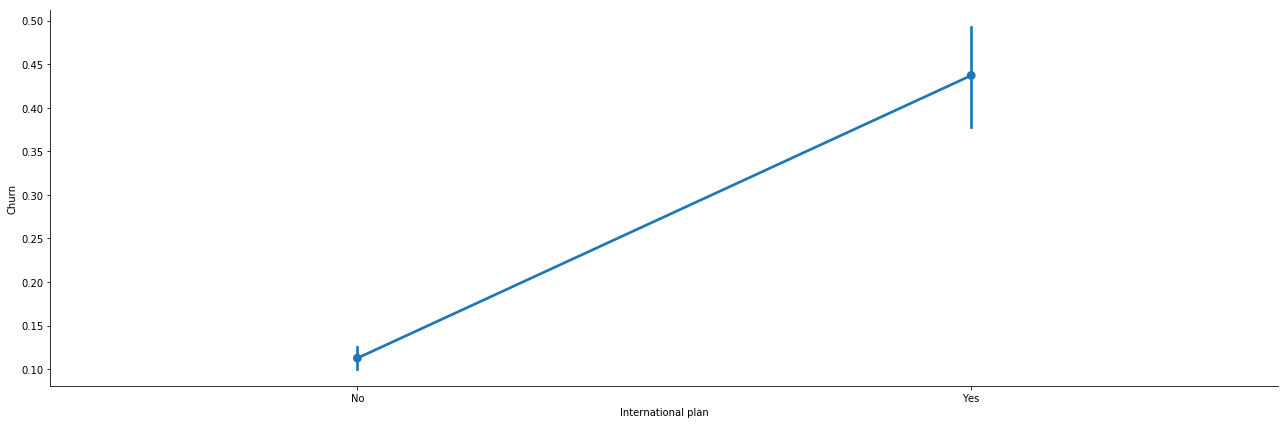

In [20]:
import seaborn as sns
%matplotlib inline

sns.factorplot(x='International plan', y='Churn', data=df, size=6, aspect=3);

In [21]:
sns.factorplot(x='Voice mail plan', y='Churn', data=df, size=6, aspect=3);

/home/infinitemonkeys/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


In [22]:
sns.boxplot(x='Voice mail plan', y='Churn', data=df);

/home/infinitemonkeys/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


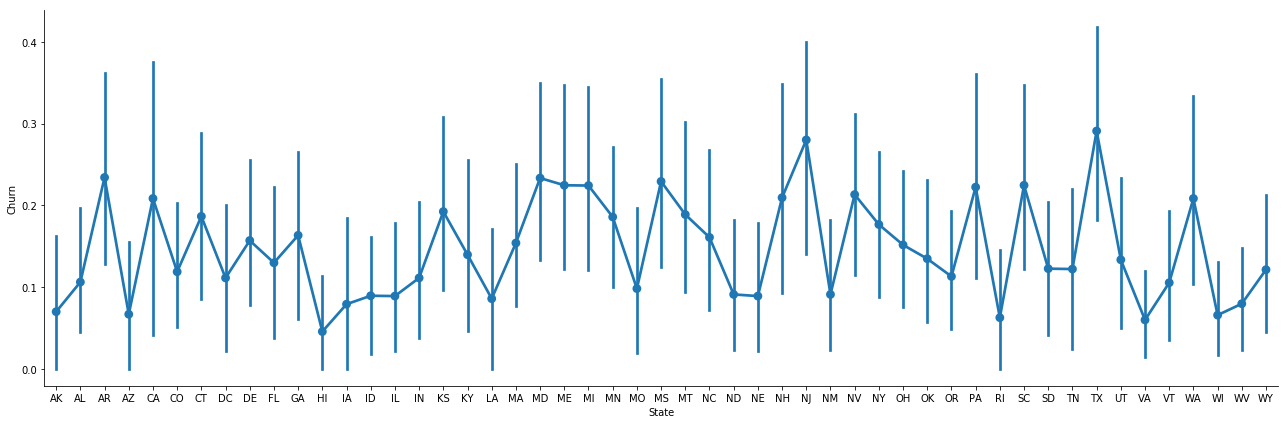

In [23]:
sns.factorplot(x='State', y='Churn', data=df, size=6, aspect=3);

Tabla de frecuencias que relaciona Churn con International y Voice mail plan

In [24]:
# df.pivot_table('Churn', index=['Voice mail plan','International plan'], columns='class',aggfunc='count')
df.pivot_table('Churn', 
               index='Voice mail plan', 
               columns='International plan', 
               margins=True, 
               aggfunc='mean')

International plan    No   Yes   All
Voice mail plan                     
No                 0.135 0.456 0.167
Yes                0.055 0.387 0.089
All                0.113 0.437 0.146

In [25]:
X = df.drop('Churn', axis=1)
y = df.Churn

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=0)